In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import latent vectors

In [ ]:
import numpy as np

In [ ]:
with open('/content/drive/MyDrive/Colab_results/bad_faces_latent_vectors.npy', 'rb') as f:
    dcgan_vects = np.load(f)

dcgan_vects.shape

(5000, 1024)

In [ ]:
with open('/content/drive/MyDrive/Colab_results/ffhq_latent_vectors.npy', 'rb') as f:
    ffhq_vects = np.load(f)

ffhq_vects.shape

(5000, 1024)

In [ ]:
with open('/content/drive/MyDrive/Colab_results/tpdne_latent_vectors.npy', 'rb') as f:
    stylegan_vects = np.load(f)

stylegan_vects.shape

(5000, 1024)

# Define functions

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as c
from math import hypot
from scipy import stats
from IPython.display import clear_output 
cmap = plt.get_cmap('rainbow', 10)



def visualize(ffhq_vector, dcgan_vector, stylegan_vector, one=False, distribution=None, name=""):
  if not one:
    fig, axs = plt.subplots(2, 2, figsize=(16,16))
    axs[0, 0].scatter(ffhq_vector[:,0], ffhq_vector[:,1], c = 'b', edgecolor='black')
    axs[0, 0].set_title('Real faces')
    axs[0, 1].scatter(dcgan_vector[:,0], dcgan_vector[:,1], c = 'g', edgecolor='black')
    axs[0, 1].set_title('DCGAN')
    axs[1, 0].scatter(stylegan_vector[:,0], stylegan_vector[:,1], c = 'r', edgecolor='black')
    axs[1, 0].set_title('StyleGAN')
    axs[1, 1].scatter(ffhq_vector[:,0], ffhq_vector[:,1], c = 'b', edgecolor='black')
    axs[1, 1].scatter(dcgan_vector[:,0], dcgan_vector[:,1], c = 'g', edgecolor='black')
    axs[1, 1].scatter(stylegan_vector[:,0], stylegan_vector[:,1], c = 'r', edgecolor='black')
    if type(distribution) != type(None):
      axs[1, 1].scatter(distribution[:,0], distribution[:,1], c = 'k', edgecolor='black')
    axs[1, 1].set_title('All types')
  else:
    plt.title = "title"
    plt.rcParams["figure.figsize"] = (7,7)
    plt.scatter(ffhq_vector[:,0], ffhq_vector[:,1], c = 'b', edgecolor='black')

    plt.scatter(dcgan_vector[:,0], dcgan_vector[:,1], c = 'g', edgecolor='black')
    plt.scatter(stylegan_vector[:,0], stylegan_vector[:,1], c = 'r', edgecolor='black')
    if type(distribution) != type(None):
      plt.scatter(distribution[:,0], distribution[:,1], c = 'k', edgecolor='black')
  

def findPdf(arr):
  bins = np.linspace(arr.min(), arr.max(), 200)
  histogram, bins = np.histogram(arr, bins=bins, density=True)
  bin_centers = 0.5*(bins[1:] + bins[:-1])
  return np.column_stack((bins[:-1], histogram))

def get_best_distribution(data):
    dist_names = ['beta', 'burr', 'cauchy', 'chi2', 'erlang', 'expon', 'f', 'fisk', 'frechet_r', 'frechet_l', 'gamma',
              'genextreme', 'gengamma', 'genpareto', 'genlogistic', 'gumbel_r', 'gumbel_l', 'hypsecant', 'invgauss',
              'johnsonsu', 'laplace', 'levy', 'logistic', 'lognorm', 'loglaplace', 'maxwell', 'mielke', 'nakagami',
              'ncx2', 'ncf', 'nct', 'norm', 'pareto', 'pearson3', 'powerlaw', 'rayleigh', 'reciprocal', 'rice', 't',
              'triang', 'trapz', 'truncnorm', 'vonmises', 'weibull_min', 'weibull_max']
        #               st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        # st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        # st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        # st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        # st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        # st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        # st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        # st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        # st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        # st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(stats, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = stats.kstest(data, dist_name, args=param)
        # print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))
        clear_output()

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value
    
    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))
    return best_dist,np.column_stack(params[best_dist])

def plotMean(ffhq_vectors, dcgan_vectors, stylegan_vectors):
  ffhq_tmp = np.reshape(ffhq_vectors.mean(axis=0), (-1, 2))
  dcgan_tmp = np.reshape(dcgan_vectors.mean(axis=0), (-1, 2))
  stylegan_tmp = np.reshape(stylegan_vectors.mean(axis=0), (-1, 2))
  visualize(ffhq_tmp, dcgan_tmp, stylegan_tmp, one=True, name="Mean")

def plotStd(ffhq_vectors, dcgan_vectors, stylegan_vectors):
  ffhq_tmp = np.reshape(ffhq_vectors.std(axis=0), (-1, 2))
  dcgan_tmp = np.reshape(dcgan_vectors.std(axis=0), (-1, 2))
  stylegan_tmp = np.reshape(stylegan_vectors.std(axis=0), (-1, 2))
  visualize(ffhq_tmp, dcgan_tmp, stylegan_tmp, one=True, name="Std")

def plotVar(ffhq_vectors, dcgan_vectors, stylegan_vectors):
  ffhq_tmp = np.reshape(ffhq_vectors.var(axis=0), (-1, 2))
  dcgan_tmp = np.reshape(dcgan_vectors.var(axis=0), (-1, 2))
  stylegan_tmp = np.reshape(stylegan_vectors.var(axis=0), (-1, 2))
  visualize(ffhq_tmp, dcgan_tmp, stylegan_tmp, one=True, name="Var")

def plotDistribution(ffhq_vectors, dcgan_vectors, stylegan_vectors):
  ffhq_tmp = findPdf(ffhq_vectors)
  dcgan_tmp = findPdf(dcgan_vectors)
  stylegan_tmp = findPdf(stylegan_vectors)
  mu, sigma = ffhq_vectors[::,0].mean(), ffhq_vectors[::,0].std()
  cdf = np.random.normal(mu, sigma, 200)
  bins = np.linspace(ffhq_vectors.min(), ffhq_vectors.max(), 201)
  bin_centers = 0.5*(bins[1:] + bins[:-1])
  name,_ = get_best_distribution(ffhq_vectors[::,0])
  print(name)
  func = getattr(stats, name)
  graph = func.pdf(bin_centers, mu, sigma)
  # graph = stats.norm.pdf(bin_centers)
  pdf = np.column_stack((bin_centers, graph))
  visualize(ffhq_tmp, dcgan_tmp, stylegan_tmp, distribution=pdf)

def plotDistrParam(ffhq_vectors, dcgan_vectors, stylegan_vectors):
  _,ffhq_tmp = get_best_distribution(np.linalg.norm(ffhq_vectors, axis=0))
  _,dcgan_tmp = get_best_distribution(np.linalg.norm(dcgan_vectors, axis=0))
  _,stylegan_tmp = get_best_distribution(np.linalg.norm(stylegan_vectors, axis=0))
  visualize(ffhq_tmp, dcgan_tmp, stylegan_tmp, one=True, name="DistrParam")

def plot_all(ffhq_vectors, dcgan_vectors, stylegan_vectors, name):
  print(f"Vectors {name}")
  visualize(ffhq_vectors, dcgan_vectors, stylegan_vectors)
  plt.show()
  print(f"Mean")
  plotMean(ffhq_vectors, dcgan_vectors, stylegan_vectors)
  plt.show()
  print(f"Std")
  plotStd(ffhq_vectors, dcgan_vectors, stylegan_vectors)
  plt.show()
  print(f"Var")
  plotVar(ffhq_vectors, dcgan_vectors, stylegan_vectors)
  plt.show()
  print(f"Distribution")
  plotDistribution(ffhq_vectors, dcgan_vectors, stylegan_vectors)
  plt.show()
  print(f"Distribution params")
  plotDistrParam(ffhq_vectors, dcgan_vectors, stylegan_vectors)
  plt.show()

def save_all_plots(ffhq_vectors, dcgan_vectors, stylegan_vectors, name):
  visualize(ffhq_vectors, dcgan_vectors, stylegan_vectors)
  plt.savefig(f'{name}/data.png', bbox_inches='tight')
  plotMean(ffhq_vectors, dcgan_vectors, stylegan_vectors)
  plt.savefig(f'{name}/mean.png', bbox_inches='tight')
  plotStd(ffhq_vectors, dcgan_vectors, stylegan_vectors)
  plt.savefig(f'{name}/std.png', bbox_inches='tight')
  plotVar(ffhq_vectors, dcgan_vectors, stylegan_vectors)
  plt.savefig(f'{name}/var.png', bbox_inches='tight')
  plotDistribution(ffhq_vectors, dcgan_vectors, stylegan_vectors)
  plt.savefig(f'{name}/distr.png', bbox_inches='tight')
  plotDistrParam(ffhq_vectors, dcgan_vectors, stylegan_vectors)
  plt.savefig(f'{name}/distrParams.png', bbox_inches='tight')

  # axs[1, 1].scatter(bin_centers, ,
  #         edgecolor='black', color='k')

# TSNE

In [ ]:
from sklearn.manifold import TSNE
dcgan_vectors_encoded = TSNE(n_components=2).fit_transform(dcgan_vects)
ffhq_vectors_encoded = TSNE(n_components=2).fit_transform(ffhq_vects)
stylegan_vectors_encoded = TSNE(n_components=2).fit_transform(stylegan_vects)

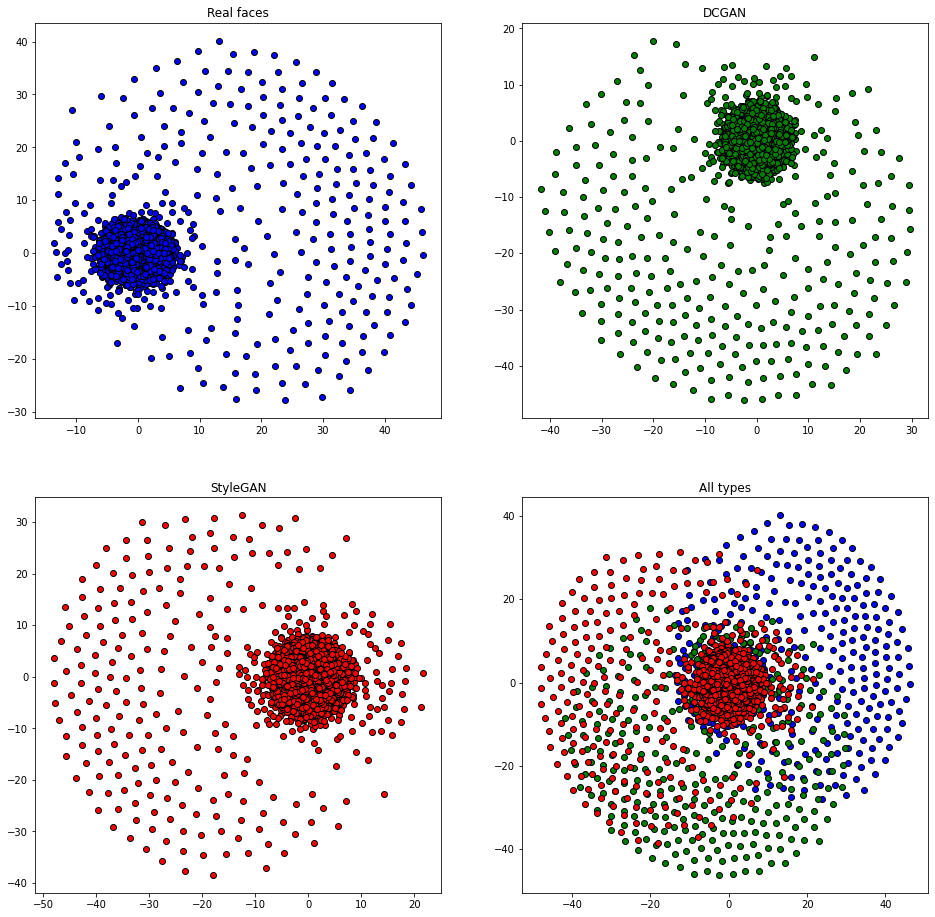

In [ ]:
visualize(ffhq_vectors_encoded, dcgan_vectors_encoded, stylegan_vectors_encoded)

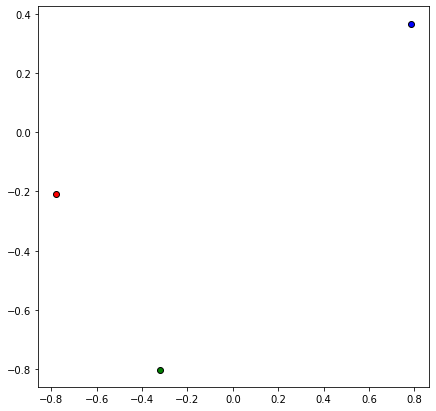

In [ ]:
plotMean(ffhq_vectors_encoded, dcgan_vectors_encoded, stylegan_vectors_encoded)
plot.show()

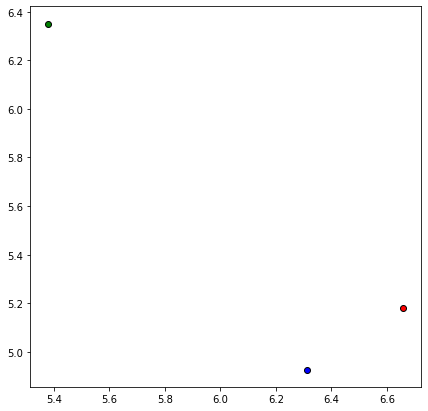

In [ ]:
plotStd(ffhq_vectors_encoded, dcgan_vectors_encoded, stylegan_vectors_encoded)

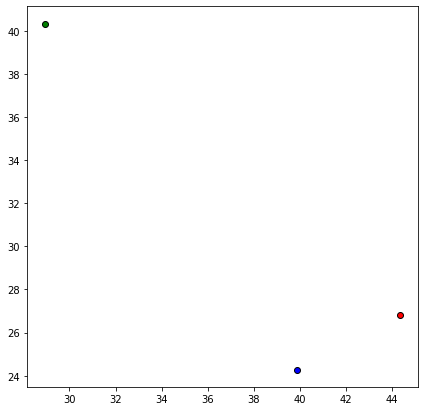

In [ ]:
plotVar(ffhq_vectors_encoded, dcgan_vectors_encoded, stylegan_vectors_encoded)

Best fitting distribution: johnsonsu
Best p value: 8.228685629850335e-06
Parameters for the best fit: (-0.3157970237212202, 0.8612340503301449, -0.9023168666487693, 1.7862012193464083)
johnsonsu


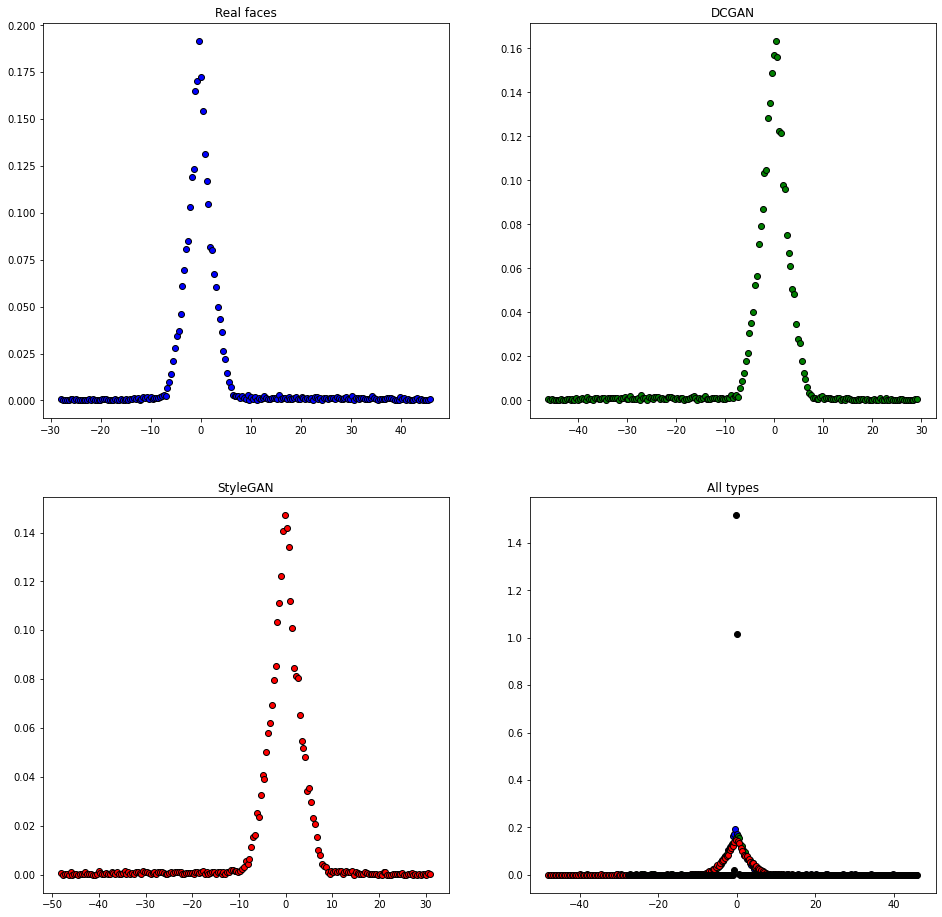

In [ ]:
plotDistribution(ffhq_vectors_encoded, dcgan_vectors_encoded, stylegan_vectors_encoded)

Best fitting distribution: hypsecant
Best p value: 0.9892656654868721
Parameters for the best fit: (420.23130156559716, 44.79791071894657)


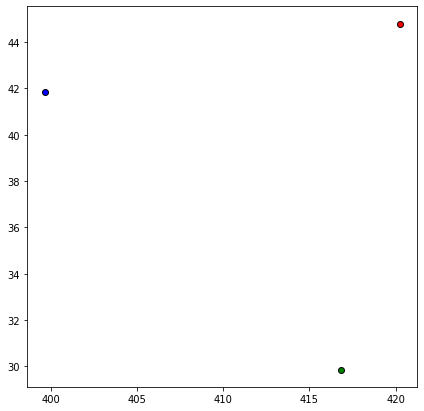

In [ ]:
plotDistrParam(ffhq_vectors_encoded, dcgan_vectors_encoded, stylegan_vectors_encoded)

# PCA

In [ ]:
from sklearn.decomposition import PCA
pca_dcgan = PCA(n_components=2)
pca_ffhq = PCA(n_components=2)
pca_stylegan = PCA(n_components=2)

In [ ]:
dcgan_vectors_encoded_pca = pca_dcgan.fit_transform(dcgan_vects)
ffhq_vectors_encoded_pca = pca_ffhq.fit_transform(ffhq_vects)
stylegan_vectors_encoded_pca = pca_stylegan.fit_transform(stylegan_vects)

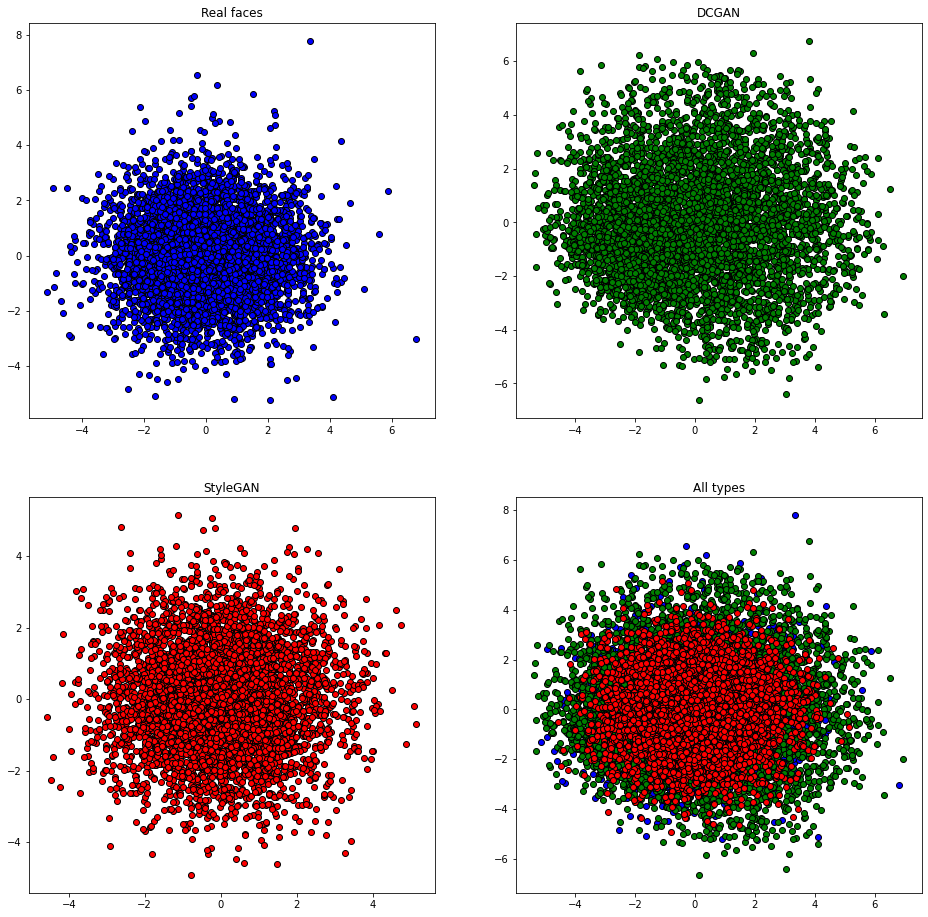

In [ ]:
visualize(ffhq_vectors_encoded_pca, dcgan_vectors_encoded_pca, stylegan_vectors_encoded_pca)

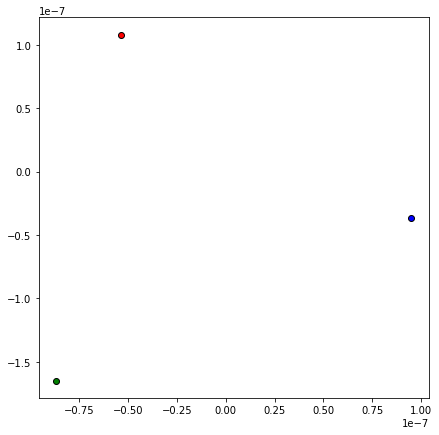

In [ ]:
plotMean(ffhq_vectors_encoded_pca, dcgan_vectors_encoded_pca, stylegan_vectors_encoded_pca)

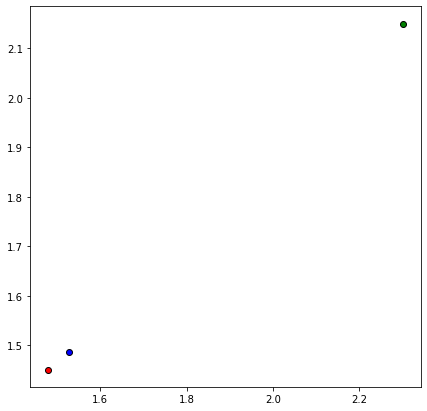

In [ ]:
plotStd(ffhq_vectors_encoded_pca, dcgan_vectors_encoded_pca, stylegan_vectors_encoded_pca)

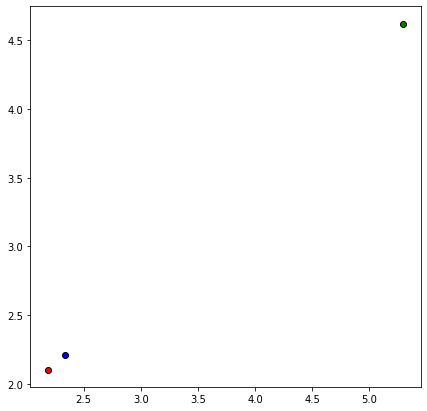

In [ ]:
plotVar(ffhq_vectors_encoded_pca, dcgan_vectors_encoded_pca, stylegan_vectors_encoded_pca)

Best fitting distribution: gengamma
Best p value: 0.49490764605169113
Parameters for the best fit: (2.342615628328149, 2.8614090614691152, -6.431236505295198, 5.016717765370147)
gengamma


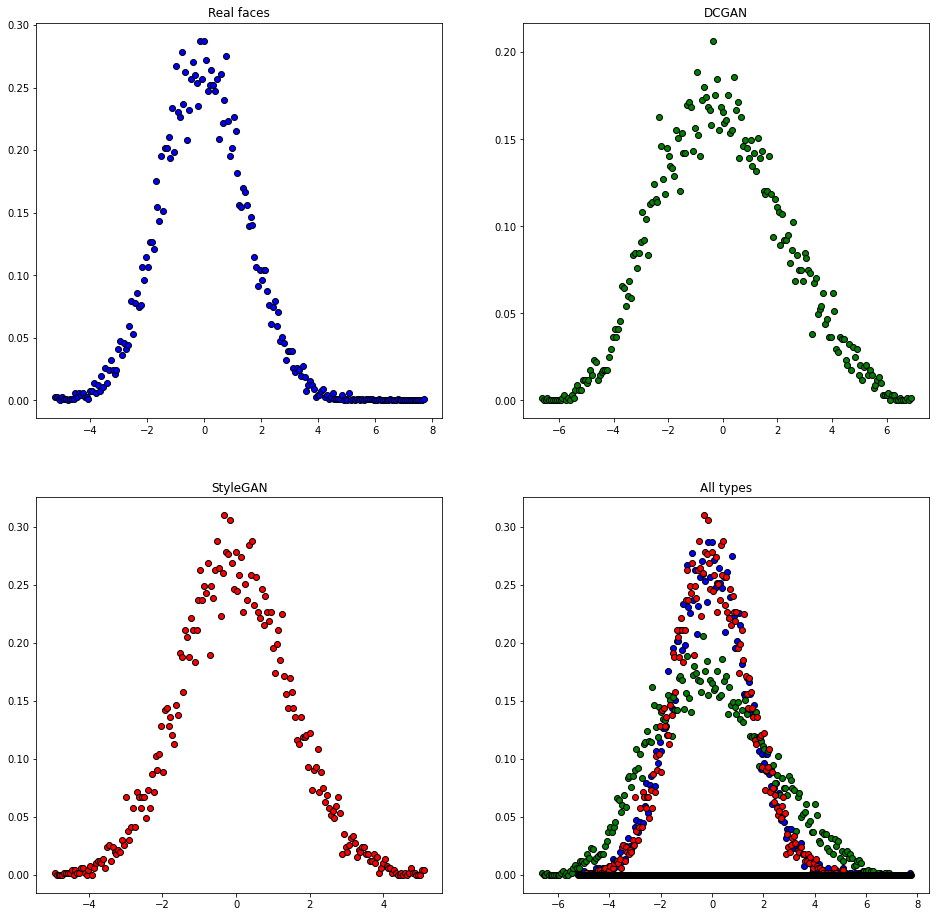

In [ ]:
plotDistribution(ffhq_vectors_encoded_pca, dcgan_vectors_encoded_pca, stylegan_vectors_encoded_pca)

Best fitting distribution: hypsecant
Best p value: 0.9893053962037579
Parameters for the best fit: (103.58150903099987, 0.8239763423345958)


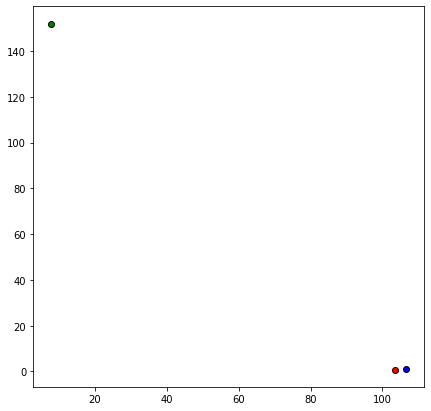

In [ ]:
plotDistrParam(ffhq_vectors_encoded_pca, dcgan_vectors_encoded_pca, stylegan_vectors_encoded_pca)

# KPCA

In [ ]:
from sklearn.decomposition import KernelPCA as KPCA
degree = 5
kpca_dcgan = KPCA(n_components=2, kernel='poly', degree=degree)
kpca_ffhq = KPCA(n_components=2, kernel='poly', degree=degree)
kpca_stylegan = KPCA(n_components=2, kernel='poly', degree=degree)

In [ ]:
dcgan_vectors_encoded_kpca = kpca_dcgan.fit_transform(dcgan_vects)
ffhq_vectors_encoded_kpca = kpca_ffhq.fit_transform(ffhq_vects)
stylegan_vectors_encoded_kpca = kpca_stylegan.fit_transform(stylegan_vects)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


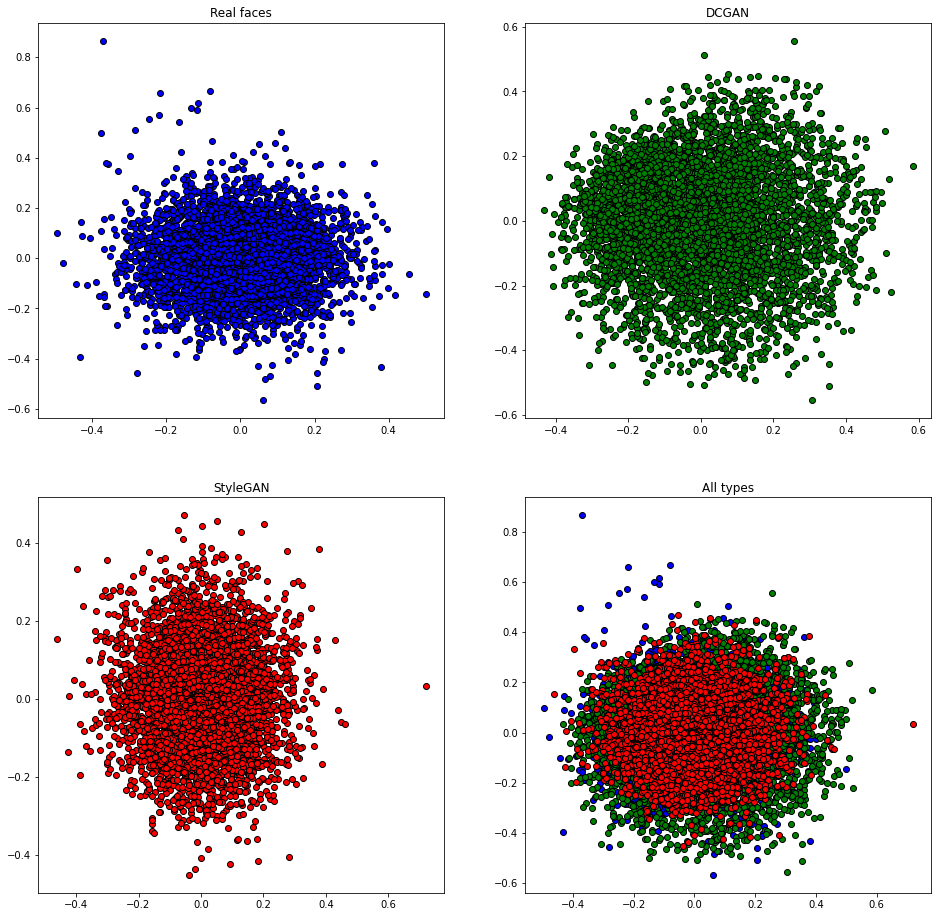

In [ ]:
visualize(ffhq_vectors_encoded_kpca, dcgan_vectors_encoded_kpca, stylegan_vectors_encoded_kpca)

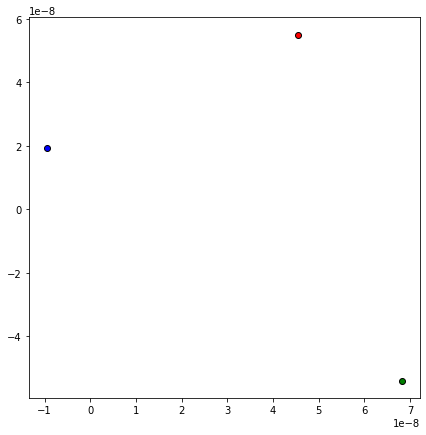

In [ ]:
plotMean(ffhq_vectors_encoded_kpca, dcgan_vectors_encoded_kpca, stylegan_vectors_encoded_kpca)

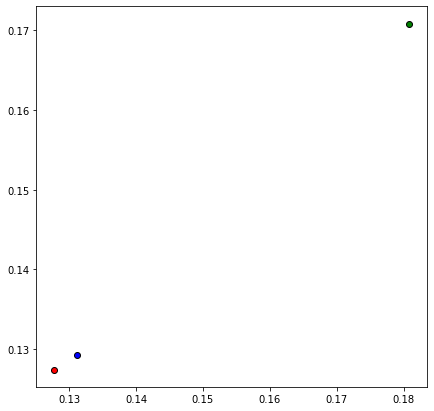

In [ ]:
plotStd(ffhq_vectors_encoded_kpca, dcgan_vectors_encoded_kpca, stylegan_vectors_encoded_kpca)

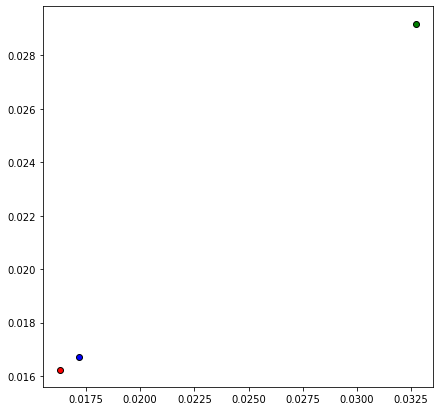

In [ ]:
plotVar(ffhq_vectors_encoded_kpca, dcgan_vectors_encoded_kpca, stylegan_vectors_encoded_kpca)

Best fitting distribution: gengamma
Best p value: 0.3954832607901095
Parameters for the best fit: (3.626101056493579, 3.779537300340217, -0.9109234190300591, 0.6657735477486757)
gengamma


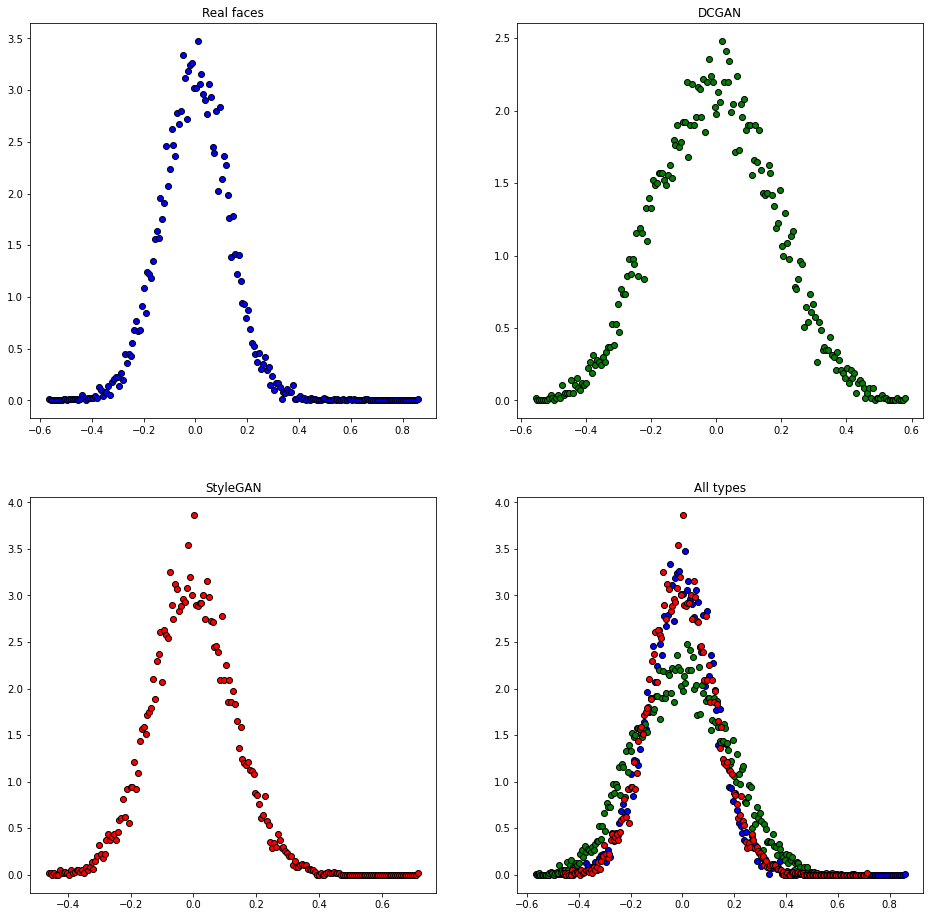

In [ ]:
plotDistribution(ffhq_vectors_encoded_kpca, dcgan_vectors_encoded_kpca, stylegan_vectors_encoded_kpca)

Best fitting distribution: trapz
Best p value: 0.989053236901842
Parameters for the best fit: (1.0, 1.0, 8.992027517900171, 0.04576743134066177)


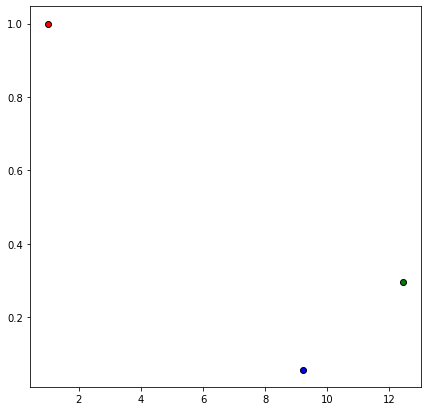

In [ ]:
plotDistrParam(ffhq_vectors_encoded_kpca, dcgan_vectors_encoded_kpca, stylegan_vectors_encoded_kpca)

# TruncatedSVD

In [ ]:
from sklearn.decomposition import TruncatedSVD
n_iter = 500
svd_dcgan = TruncatedSVD(n_components = 2, n_iter = n_iter)
svd_ffhq = TruncatedSVD(n_components = 2, n_iter = n_iter)
svd_stylegan = TruncatedSVD(n_components = 2, n_iter = n_iter)

In [ ]:
dcgan_vectors_encoded_svd = svd_dcgan.fit_transform(dcgan_vects)
ffhq_vectors_encoded_svd = svd_ffhq.fit_transform(ffhq_vects)
stylegan_vectors_encoded_svd = svd_stylegan.fit_transform(stylegan_vects)

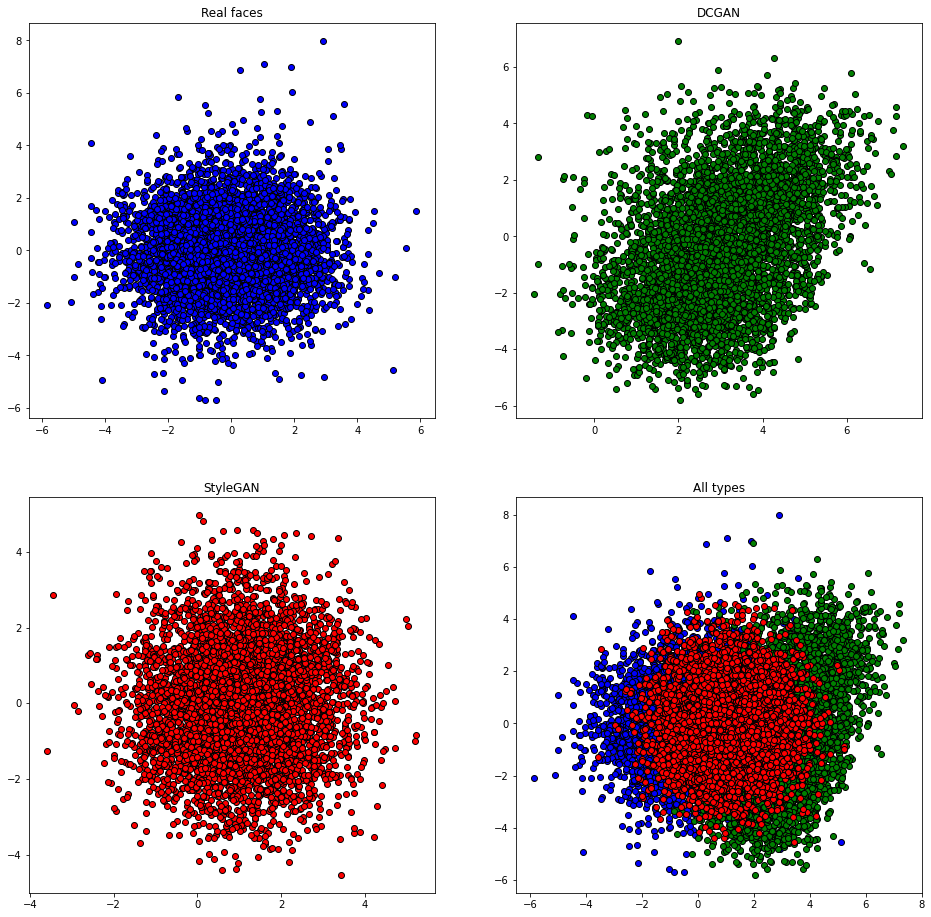

In [ ]:
visualize(ffhq_vectors_encoded_svd, dcgan_vectors_encoded_svd, stylegan_vectors_encoded_svd)

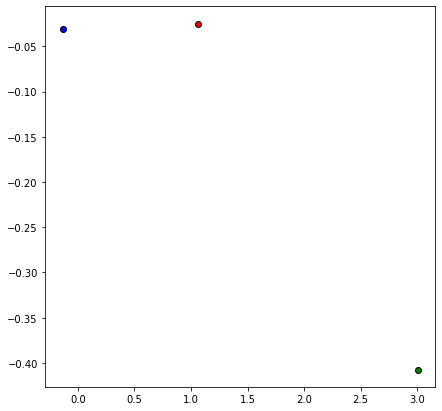

In [ ]:
plotMean(ffhq_vectors_encoded_svd, dcgan_vectors_encoded_svd, stylegan_vectors_encoded_svd)

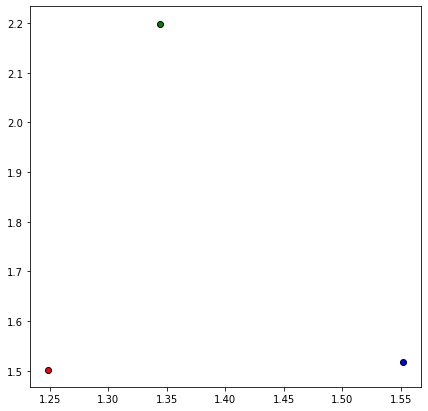

In [ ]:
plotStd(ffhq_vectors_encoded_svd, dcgan_vectors_encoded_svd, stylegan_vectors_encoded_svd)

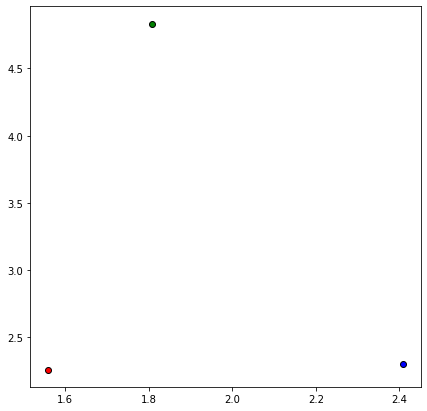

In [ ]:
plotVar(ffhq_vectors_encoded_svd, dcgan_vectors_encoded_svd, stylegan_vectors_encoded_svd)

Best fitting distribution: genextreme
Best p value: 0.9362974559597326
Parameters for the best fit: (0.22183907631339095, -0.7282584967675318, 1.5176183608046059)
genextreme


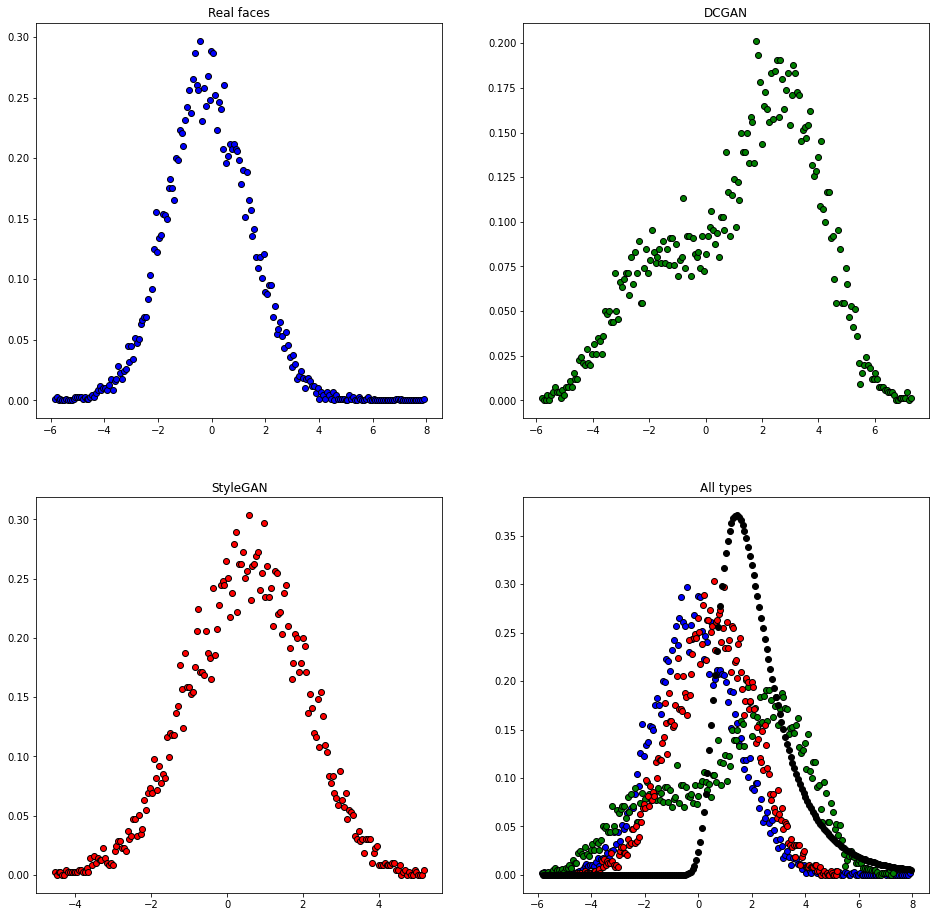

In [ ]:
plotDistribution(ffhq_vectors_encoded_svd, dcgan_vectors_encoded_svd, stylegan_vectors_encoded_svd)

In [ ]:
plotDistrParam(ffhq_vectors_encoded_svd, dcgan_vectors_encoded_svd, stylegan_vectors_encoded_svd)